<div style="text-align: right;">© 2025 Moses Boudourides. All Rights Reserved.</div>

## *instats* Workshop, March 9-12, 2025 
### https://instats.org/seminar/hypernetworks-in-theory-and-practice

# KEY METHODS OF HYPERGRAPH ANALYSIS
## Moses Boudourides

# III. CLIQUE REPRESENTATION OF HYPERGRAPHS

<span style="color:green">
    
### [1. Clique-Based Hypergraph Representation of Graphs](#1)

### [2. Dominating Ego-Clique-Based Hypergraph Representation of Ego-Centered Graphs](#2)
         
</span>

In [1]:
import pandas as pd
import numpy as np
import random
import string
import json
import pickle
import itertools
from itertools import chain
from collections import Counter, defaultdict
lowercase_letters = list(string.ascii_lowercase)
uppercase_letters = list(string.ascii_uppercase)
import hypernetx as hnx
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
all_colors = list(mcolors.CSS4_COLORS.keys())
cmap_list = ['tab20', 'tab10', 'Set1', 'Set2', 'Set3', 'Paired', 'Accent']
distinct_colors = [color for cmap in cmap_list for color in plt.get_cmap(cmap).colors] #[:50]
import pyvis
from pyvis.network import Network
from IPython.display import display, HTML, IFrame
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="hypernetx")

In [2]:
def find_maximal_cliques(G):
    """
    Find all maximal cliques in the graph G using networkx's find_cliques function.
    
    Parameters:
    - G: A networkx graph
    
    Returns:
    - A list of sets, where each set contains the vertices of a maximal clique.
    """
    lists = nx.find_cliques(G)
    lists = [sorted(x) for x in lists]
    return sorted(list(lists), key=len, reverse=True)

def hgp_pyvis(d, name1, name2, vertex_size, hyperedge_size, vertex_color, hyperedge_colors, roundness, output_file="hypergraph.html"):
    """
    Visualizes a hypergraph using PyVis with labels on all nodes.

    Parameters:
    - d (dict): Hypergraph data, either with or without vertex weights.
                Example with weights: {'Group_A': {'Bob': 5, 'Jessy': 4}}
                Example without weights: {'Group_A': {'Bob', 'Jessy'}}
    - name1 (str): Label prefix for hyperedges (dictionary keys).
    - name2 (str): Label prefix for vertices (elements in dictionary values).
    - vertex_size (int): Size of vertices.
    - hyperedge_size (int): Size of hyperedges.
    - vertex_color (str): Color of vertices.
    - hyperedge_colors (list): Colors for hyperedges.
    - roundness (float): Curvature of edges.
    - output_file (str): Output HTML file (default: "hypergraph.html").
    """
    net = Network(notebook=True, height="800px", width="100%", bgcolor="#ffffff", font_color="black", cdn_resources="remote")
    G = nx.Graph()
    first_group_members = next(iter(d.values()))
    has_weights = isinstance(first_group_members, dict)
    for group, members in d.items():
        if has_weights:
            for member, weight in members.items():
                G.add_edge(group, member, weight=weight)  
        else:
            for member in members:
                G.add_edge(group, member, weight=1)  
    group_colors = {group: hyperedge_colors[idx % len(hyperedge_colors)] for idx, group in enumerate(d.keys())}
    for node in d.keys():
        net.add_node(node, size=hyperedge_size, color=group_colors[node], 
                     title=f"{name1}: {node}", label=str(node), font={"size": 20})
    all_vertices = set(G.nodes()) - set(d.keys())
    for node in all_vertices:
        net.add_node(node, size=vertex_size, color=vertex_color, 
                     title=f"{name2}: {node}", label=str(node), font={"size": 15})
#         formatted_node = tuple(node) if isinstance(node, frozenset) else node
#         net.add_node(formatted_node, size=vertex_size, color=vertex_color, 
#              title=f"{name2}: {formatted_node}", label=str(formatted_node), font={"size": 15})
        
#         formatted_node = str(sorted(node)) if isinstance(node, frozenset) else str(node)
#         net.add_node(formatted_node, size=vertex_size, color=vertex_color, title=f"{name2}: {formatted_node}", label=formatted_node, font={"size": 15})
        
#     for node in all_vertices:
#         node=str(node)
#         formatted_node = format_frozenset(node)  # Convert frozenset to a formatted string
#         net.add_node(formatted_node, size=vertex_size, color=vertex_color, 
#                  title=f"{name2}: {node}", label=formatted_node, font={"size": 15})
    for source, target, data in G.edges(data=True):
        edge_color = group_colors[source] if source in d else group_colors[target]
        net.add_edge(source, target, 
                     width=data['weight'] if has_weights else 1, 
                     color=edge_color,
                     label=str(data['weight']) if has_weights else "",  
                     label_size=20,
                     label_align='center',
                     label_x_offset=0,
                     label_y_offset=0,
                     title=f"Weight: {data['weight']}" if has_weights else "",  
                     smooth={"type": "curvedCCW", "roundness": roundness})  

#     for source, target, data in G.edges(data=True):
#         formatted_source = format_node(source)
#         formatted_target = format_node(target)
#         edge_color = group_colors[source] if source in d else group_colors[target]
#         net.add_edge(formatted_source, formatted_target, 
#                      width=data['weight'] if has_weights else 1, 
#                      color=edge_color,
#                      label=str(data['weight']) if has_weights else "",  
#                      label_size=20,
#                      label_align='center',
#                      label_x_offset=0,
#                      label_y_offset=0,
#                      title=f"Weight: {data['weight']}" if has_weights else "",  
#                      smooth={"type": "curvedCCW", "roundness": roundness})
    
#     existing_nodes = set(net.get_nodes())  # Get current nodes

#     for source, target, data in G.edges(data=True):
#         formatted_source = format_node(source)
#         formatted_target = format_node(target)
        
#         edge_color = group_colors[formatted_source] if source in d else group_colors[formatted_target]

#         # Ensure source and target exist before adding edges
#         if formatted_source not in existing_nodes or formatted_target not in existing_nodes:
#             print(f"Skipping edge {formatted_source} -> {formatted_target}: node missing")
#             continue  # Skip adding the edge

#         net.add_edge(formatted_source, formatted_target, 
#                      width=data['weight'] if has_weights else 1, 
#                      color=edge_color,
#                      label=str(data['weight']) if has_weights else "",  
#                      label_size=20,
#                      label_align='center',
#                      label_x_offset=0,
#                      label_y_offset=0,
#                      title=f"Weight: {data['weight']}" if has_weights else "",  
#                      smooth={"type": "curvedCCW", "roundness": roundness})
    
#     existing_nodes = set(net.get_nodes())  # Get current nodes
    
# #     group_colors = {str(k): v for k, v in group_colors.items()} 

#     group_colors = {group: hyperedge_colors[idx % len(hyperedge_colors)] for idx, group in enumerate(d.keys())}

#     for source, target, data in G.edges(data=True):
#         formatted_source = str(source)  # Ensure it's a string
#         formatted_target = str(target)

#         # Ensure source and target exist before accessing group_colors
#         if formatted_source in d:
#             edge_color = group_colors.get(formatted_source, "gray")
#         else:
#             edge_color = group_colors.get(formatted_target, "gray")

#         # Ensure nodes exist before adding edges
#         if formatted_source not in existing_nodes or formatted_target not in existing_nodes:
#             print(f"Skipping edge {formatted_source} -> {formatted_target}: node missing")
#             continue  # Skip adding the edge

#         net.add_edge(formatted_source, formatted_target, 
#                      width=data['weight'] if has_weights else 1, 
#                      color=edge_color,
#                      label=str(data['weight']) if has_weights else "",  
#                      label_size=20,
#                      label_align='center',
#                      label_x_offset=0,
#                      label_y_offset=0,
#                      title=f"Weight: {data['weight']}" if has_weights else "",  
#                      smooth={"type": "curvedCCW", "roundness": roundness})
    
    net.toggle_physics(True)
    net.save_graph(output_file)

    return IFrame(src=output_file, width="100%", height="800px")

def domego(G):
    assert not G.is_directed(), "The graph must be undirected."
    
    NL = list(G.nodes)  # Work with a list of nodes
    E = []  # Egos
    A = []  # Alters
    
    while NL:
        random.shuffle(NL)
        max_degree = max(G.degree(n) for n in NL)
        max_degree_nodes = [n for n in NL if G.degree(n) == max_degree]
        u = random.choice(max_degree_nodes)
        NL.remove(u)
        E.append(u)
        
        neighbors = list(G.neighbors(u))
        candidates = [v for v in neighbors if G.degree(v) <= G.degree(u)]
        if candidates:
            v = max(candidates, key=lambda x: G.degree(x))
            A.extend([w for w in neighbors if w != v])
        else:
            A.extend(neighbors)
        
        NL = [z for z in NL if z not in A]
    
    A = list(set(A))
    
    # Handle connected nodes in E
    for u in E[:]:
        for v in E:
            if u != v and G.has_edge(u, v):
                neighbors_u = set(G.neighbors(u)) - {v}
                neighbors_v = set(G.neighbors(v)) - {u}
                
                if any(w in E for w in neighbors_u) or any(w in E for w in neighbors_v):
                    z = random.choice([u, v])
                    if z in E:
                        E.remove(z)
                        A.append(z)
                else:
                    two_hop_neighbors_u = {w for neighbor in neighbors_u for w in G.neighbors(neighbor)} - {u, v}
                    two_hop_neighbors_v = {w for neighbor in neighbors_v for w in G.neighbors(neighbor)} - {u, v}
                    if any(w in E for w in two_hop_neighbors_u) or any(w in E for w in two_hop_neighbors_v):
                        z = random.choice([u, v])
                        if z in E:
                            E.remove(z)
                            A.append(z)
                break
    
    # Ensure no leaf in A moves to E incorrectly
    for u in A[:]:
        neighbors_u = set(G.neighbors(u))
        if neighbors_u.issubset(set(A)) and not any(neighbor in E for neighbor in neighbors_u):
            if u in A:
                A.remove(u)
                E.append(u)
    
    return E, A

def create_clique_based_hypergraph(G, egos=None):
    """
    Create the clique-based hypergraph for the given graph G. The hypergraph's vertices are the nodes of G.
    If 'egos' is given, only the hyperedges for the nodes in 'egos' are included in the returned dictionary.
    
    Parameters:
    - G: A networkx graph
    - egos: A list of nodes for which to return hyperedges. If None, process all nodes.
    
    Returns:
    - A dictionary representing the clique-based hypergraph.
      The keys are the vertices in V (filtered by 'egos'), and the values are lists of cliques that contain each vertex.
    """
    # If egos is provided, process only those nodes
    if egos is None:
        nodes_to_process = set(G.nodes())  # Process all nodes
    else:
        nodes_to_process = set(egos)  # Process only the specified egos

    # Find the maximal cliques (for all nodes)
    maximal_cliques = find_maximal_cliques(G)
    
    # Initialize the dictionary to store the hyperedges
    hypergraph = {}

    # For each maximal clique, update the dictionary only for the nodes in `nodes_to_process`
    for clique in maximal_cliques:
        for v in clique:
            if v in nodes_to_process:
                # If the node is not already in the dictionary, initialize an empty list
                if v not in hypergraph:
                    hypergraph[v] = []
                # Append the current clique (as a list) to the node's hyperedge list
                hypergraph[v].append(sorted(clique))  # Store the clique as a list

    return hypergraph

# def format_frozenset(fs):
#     return f"Clique({', '.join(sorted(fs))})"

# def format_node(node):
#     """Ensure consistent naming for nodes"""
#     return str(sorted(node)) if isinstance(node, frozenset) else str(node)

<a id='1'></a>
## <span style="color:green">1. Clique-Based Hypergraph Representation of Graphs</span>

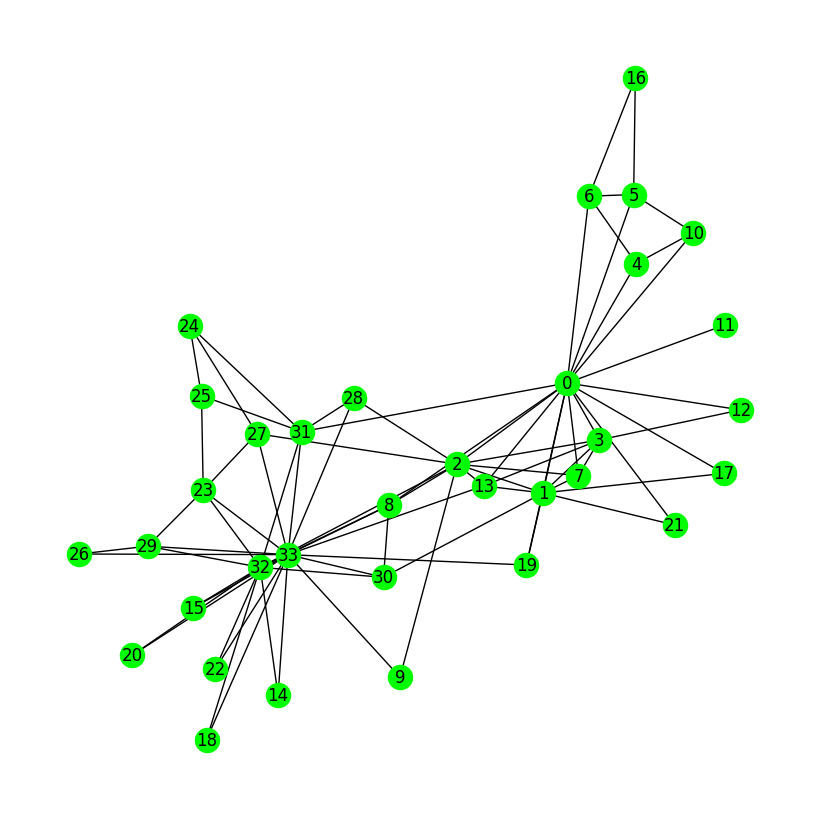

In [3]:
G = nx.karate_club_graph()
nx.draw(G,with_labels=True,node_color="lime")
plt.show()

36 {'clique_0': [0, 1, 2, 3, 13], 'clique_1': [0, 1, 2, 3, 7], 'clique_2': [8, 30, 32, 33], 'clique_3': [23, 29, 32, 33], 'clique_4': [0, 1, 17], 'clique_5': [0, 1, 19], 'clique_6': [0, 1, 21], 'clique_7': [0, 4, 10], 'clique_8': [0, 4, 6], 'clique_9': [0, 5, 10], 'clique_10': [0, 5, 6], 'clique_11': [0, 2, 8], 'clique_12': [0, 3, 12], 'clique_13': [2, 8, 32], 'clique_14': [5, 6, 16], 'clique_15': [14, 32, 33], 'clique_16': [15, 32, 33], 'clique_17': [18, 32, 33], 'clique_18': [20, 32, 33], 'clique_19': [22, 32, 33], 'clique_20': [31, 32, 33], 'clique_21': [26, 29, 33], 'clique_22': [23, 27, 33], 'clique_23': [28, 31, 33], 'clique_24': [24, 25, 31], 'clique_25': [0, 11], 'clique_26': [0, 31], 'clique_27': [1, 30], 'clique_28': [2, 9], 'clique_29': [2, 27], 'clique_30': [2, 28], 'clique_31': [9, 33], 'clique_32': [13, 33], 'clique_33': [19, 33], 'clique_34': [24, 27], 'clique_35': [23, 25]}


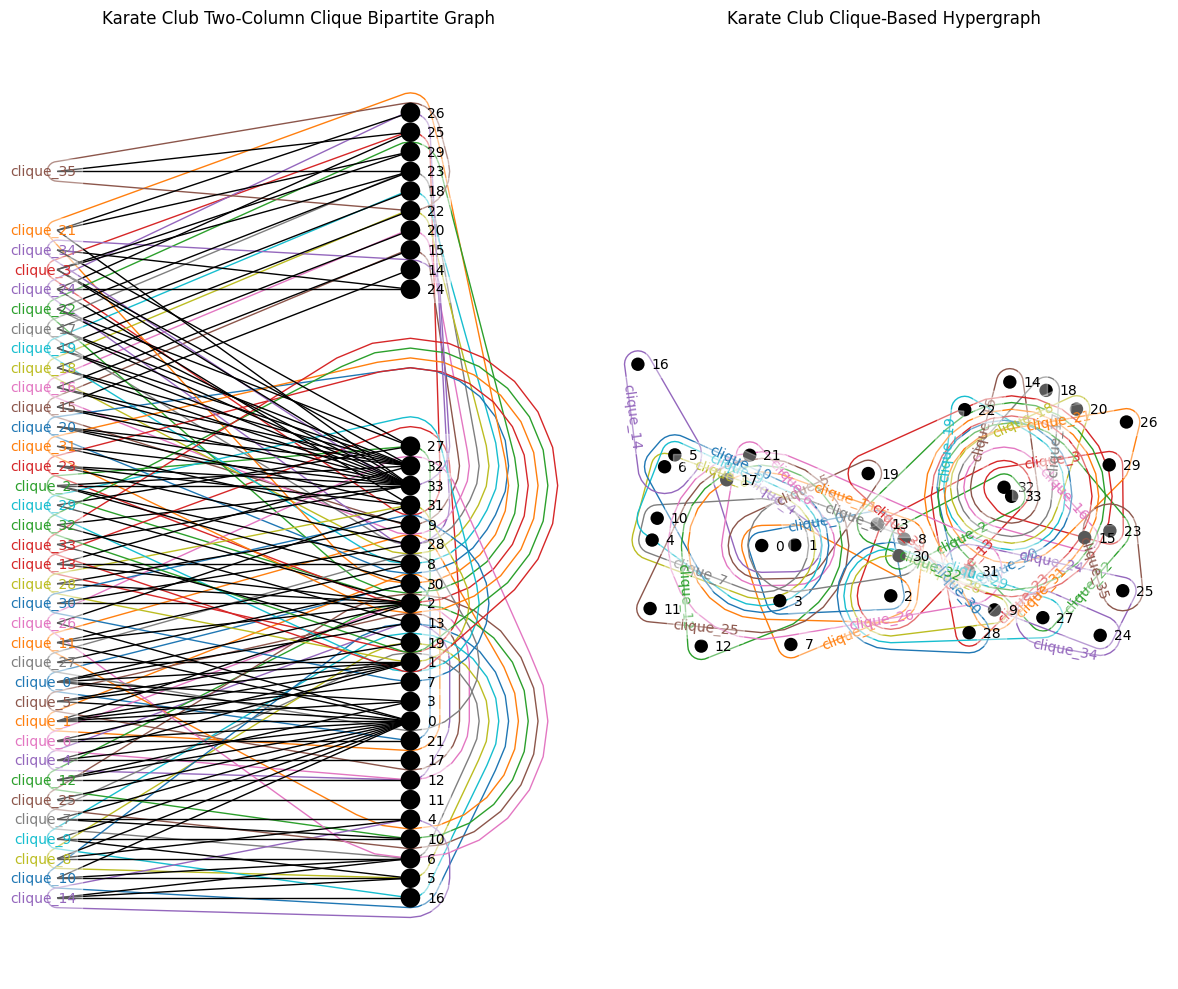

In [4]:
G = nx.karate_club_graph()
cliques = find_maximal_cliques(G)

hg_d = {f"clique_{i}": clique for i, clique in enumerate(cliques)}
print(len(hg_d),hg_d)
dual_hg_d = {v: [k for k in hg_d if v in hg_d[k]] for v in set().union(*hg_d.values())}

H_hnx = hnx.Hypergraph(hg_d)

fig, axes = plt.subplots(1, 2, figsize=(12, 10))

hnx.draw_bipartite_using_euler(H_hnx, ax=axes[0])
axes[0].set_title("Karate Club Two-Column Clique Bipartite Graph")

hnx.draw(H_hnx, ax=axes[1])
axes[1].set_title("Karate Club Clique-Based Hypergraph")

plt.tight_layout()
plt.show()

In [5]:
d=hg_d
name1='Hyperedge'
name2='Vertices'
vertex_size=10 
hyperedge_size=3
vertex_color="yellow"
hyperedge_colors =[c for c in random.sample(all_colors,len(d)) if c!=vertex_color]
roundness=1
output_file="Karate_clique_bipartite_hypergraph.html"
hgp_pyvis(d, name1, name2, vertex_size, hyperedge_size, vertex_color, hyperedge_colors, roundness, output_file)

No. of edges = 254


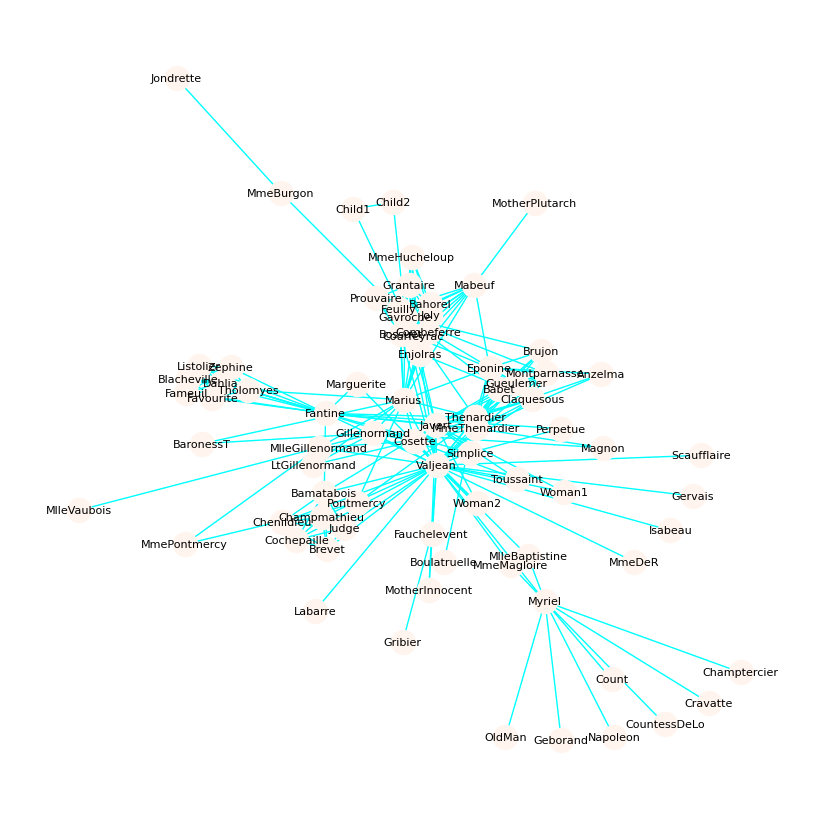

In [6]:
G = nx.les_miserables_graph()
print("No. of edges =",len(G.edges))
nx.draw(G,with_labels=True,node_color="seashell",edge_color="cyan",font_size=8)
plt.show()

59 {'clique_0': ['Bahorel', 'Bossuet', 'Combeferre', 'Courfeyrac', 'Enjolras', 'Feuilly', 'Gavroche', 'Joly', 'Mabeuf', 'Marius'], 'clique_1': ['Bahorel', 'Bossuet', 'Combeferre', 'Courfeyrac', 'Enjolras', 'Feuilly', 'Gavroche', 'Grantaire', 'Joly', 'Prouvaire'], 'clique_2': ['Blacheville', 'Dahlia', 'Fameuil', 'Fantine', 'Favourite', 'Listolier', 'Tholomyes', 'Zephine'], 'clique_3': ['Bahorel', 'Bossuet', 'Courfeyrac', 'Enjolras', 'Gavroche', 'Grantaire', 'Joly', 'MmeHucheloup'], 'clique_4': ['Babet', 'Brujon', 'Claquesous', 'Eponine', 'Gueulemer', 'Montparnasse', 'Thenardier'], 'clique_5': ['Bamatabois', 'Brevet', 'Champmathieu', 'Chenildieu', 'Cochepaille', 'Judge', 'Valjean'], 'clique_6': ['Babet', 'Claquesous', 'Gueulemer', 'Javert', 'MmeThenardier', 'Thenardier', 'Valjean'], 'clique_7': ['Babet', 'Claquesous', 'Gueulemer', 'Javert', 'Montparnasse', 'Thenardier', 'Valjean'], 'clique_8': ['Babet', 'Gavroche', 'Gueulemer', 'Javert', 'Montparnasse', 'Thenardier', 'Valjean'], 'clique_

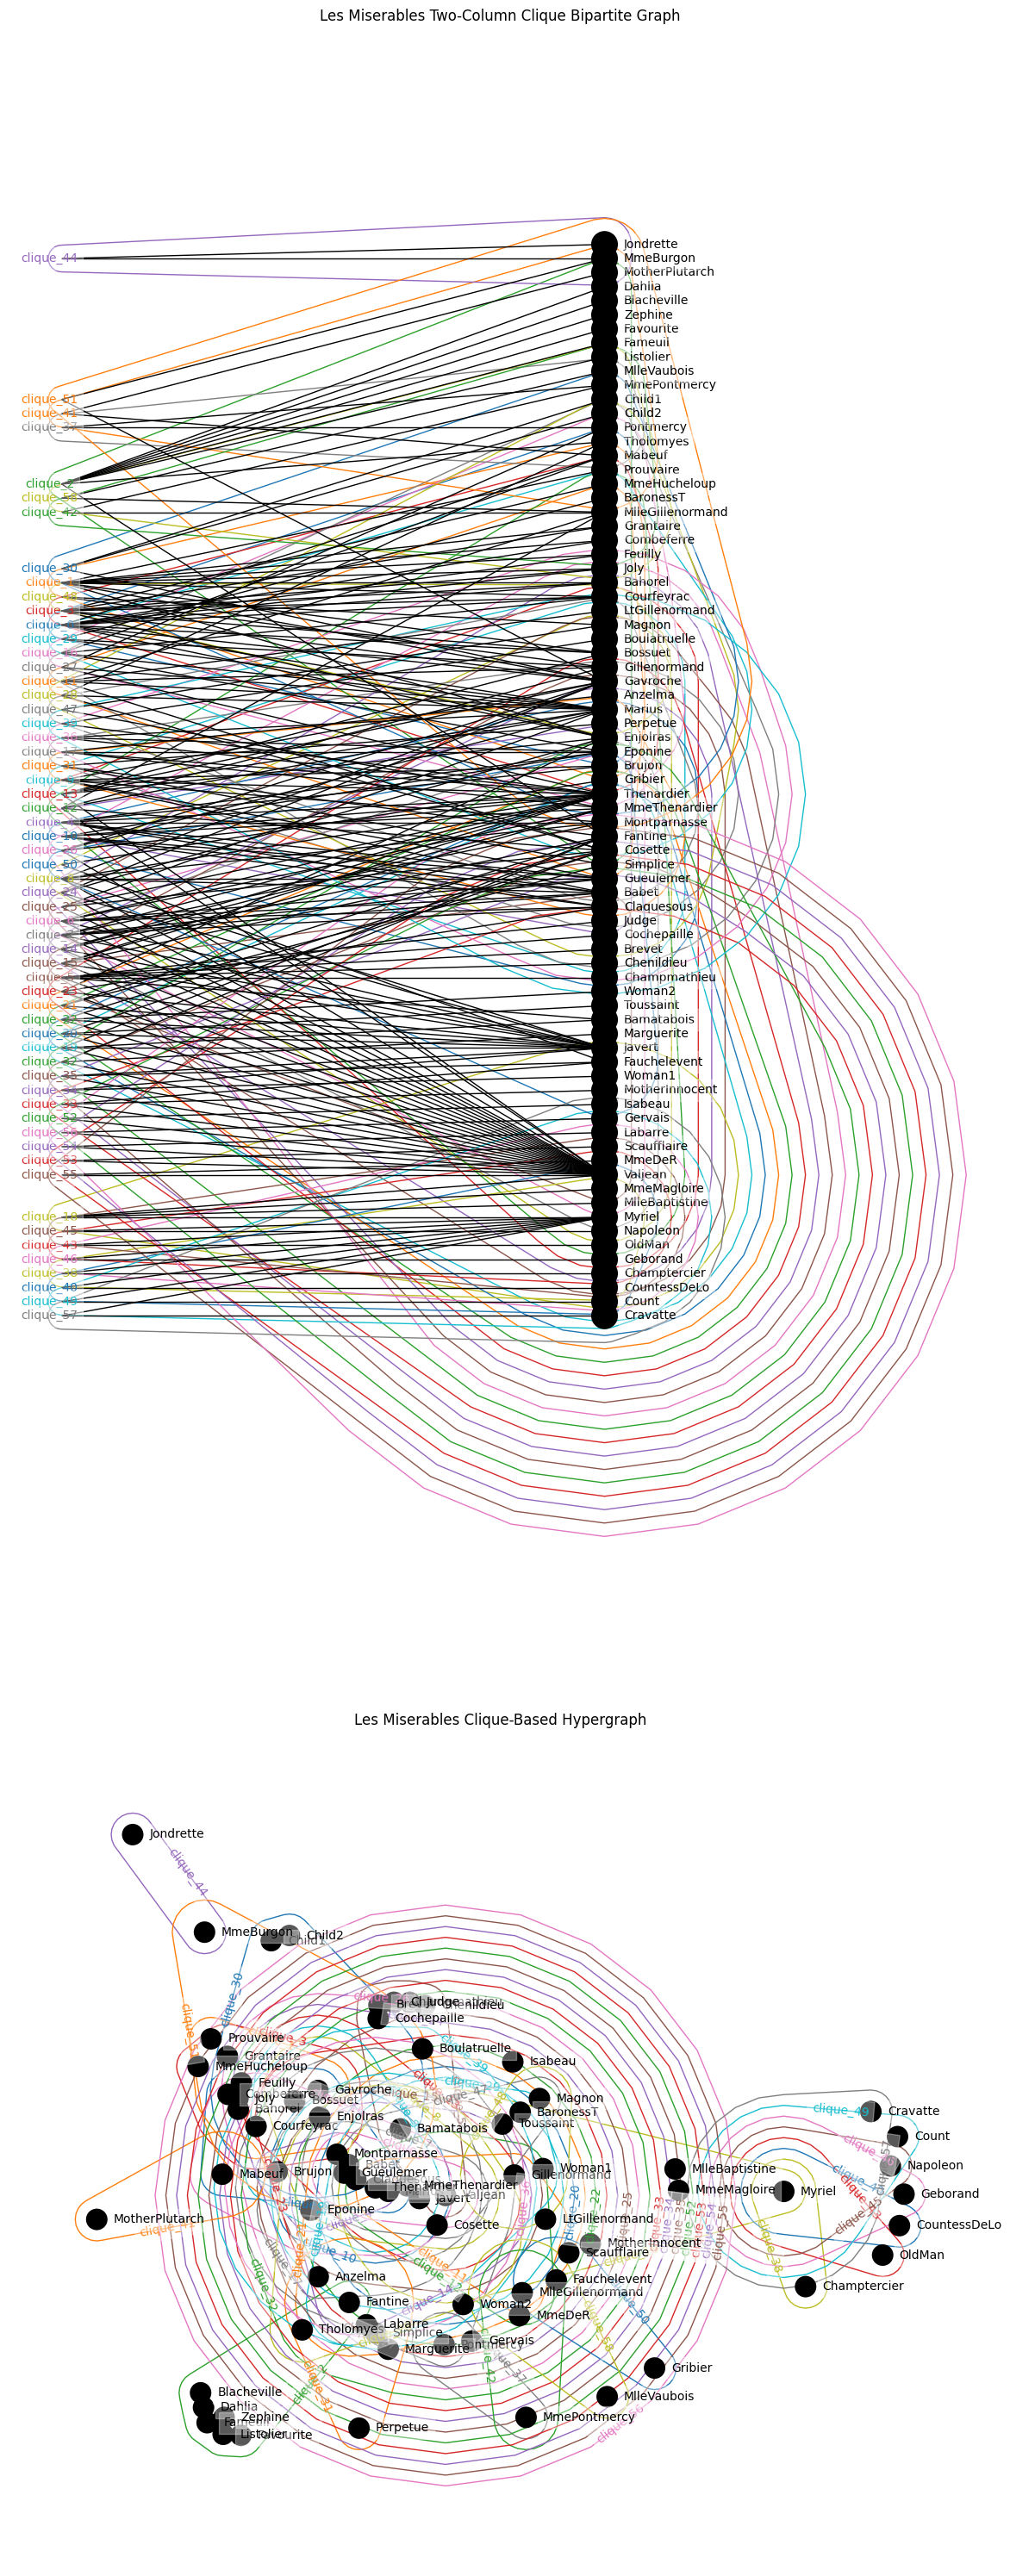

In [7]:
G = nx.les_miserables_graph()
cliques = find_maximal_cliques(G)

hg_d = {f"clique_{i}": clique for i, clique in enumerate(cliques)}
print(len(hg_d),hg_d)
# dual_hg_d = {v: [k for k in hg_d if v in hg_d[k]] for v in set().union(*hg_d.values())}
print("No. of hyperedges =",len(hg_d))
H_hnx = hnx.Hypergraph(hg_d)

# fig, axes = plt.subplots(2, 1, figsize=(12, 30))
# fig.subplots_adjust(hspace=0, wspace=-0.5)

fig = plt.figure(figsize=(12, 30))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

hnx.draw_bipartite_using_euler(H_hnx, ax=ax1) # axes[0]) # 
ax1.set_title("Les Miserables Two-Column Clique Bipartite Graph") # axes[0]

hnx.draw(H_hnx, ax=ax2) # axes[1])
ax2.set_title("Les Miserables Clique-Based Hypergraph") # axes[1]

plt.tight_layout()
plt.show()

In [8]:
d=hg_d
name1='Hyperedge'
name2='Vertices'
vertex_size=10 
hyperedge_size=3
vertex_color="yellow"
# hyperedge_colors =["lime" for _ in range(len(d))]
hyperedge_colors =[c for c in random.sample(all_colors,len(d)) if c!=vertex_color]
# hyperedge_colors = ["cyan", "lime", "lightcoral", "violet"]
roundness=1
output_file="LesMiserables_clique_bipartite_hypergraph.html"
hgp_pyvis(d, name1, name2, vertex_size, hyperedge_size, vertex_color, hyperedge_colors, roundness, output_file)

<a id='2'></a>
## <span style="color:green">2. Dominating Ego-Clique-Based Hypergraph Representation of Ego-Centered Graphs</span>

34 {'0': ['[0, 1, 2, 3, 13]', '[0, 1, 2, 3, 7]', '[0, 1, 17]', '[0, 1, 19]', '[0, 1, 21]', '[0, 4, 10]', '[0, 4, 6]', '[0, 5, 10]', '[0, 5, 6]', '[0, 2, 8]', '[0, 3, 12]', '[0, 11]', '[0, 31]'], '1': ['[0, 1, 2, 3, 13]', '[0, 1, 2, 3, 7]', '[0, 1, 17]', '[0, 1, 19]', '[0, 1, 21]', '[1, 30]'], '2': ['[0, 1, 2, 3, 13]', '[0, 1, 2, 3, 7]', '[0, 2, 8]', '[2, 8, 32]', '[2, 9]', '[2, 27]', '[2, 28]'], '3': ['[0, 1, 2, 3, 13]', '[0, 1, 2, 3, 7]', '[0, 3, 12]'], '13': ['[0, 1, 2, 3, 13]', '[13, 33]'], '7': ['[0, 1, 2, 3, 7]'], '8': ['[8, 30, 32, 33]', '[0, 2, 8]', '[2, 8, 32]'], '30': ['[8, 30, 32, 33]', '[1, 30]'], '32': ['[8, 30, 32, 33]', '[23, 29, 32, 33]', '[2, 8, 32]', '[14, 32, 33]', '[15, 32, 33]', '[18, 32, 33]', '[20, 32, 33]', '[22, 32, 33]', '[31, 32, 33]'], '33': ['[8, 30, 32, 33]', '[23, 29, 32, 33]', '[14, 32, 33]', '[15, 32, 33]', '[18, 32, 33]', '[20, 32, 33]', '[22, 32, 33]', '[31, 32, 33]', '[26, 29, 33]', '[23, 27, 33]', '[28, 31, 33]', '[9, 33]', '[13, 33]', '[19, 33]'], '

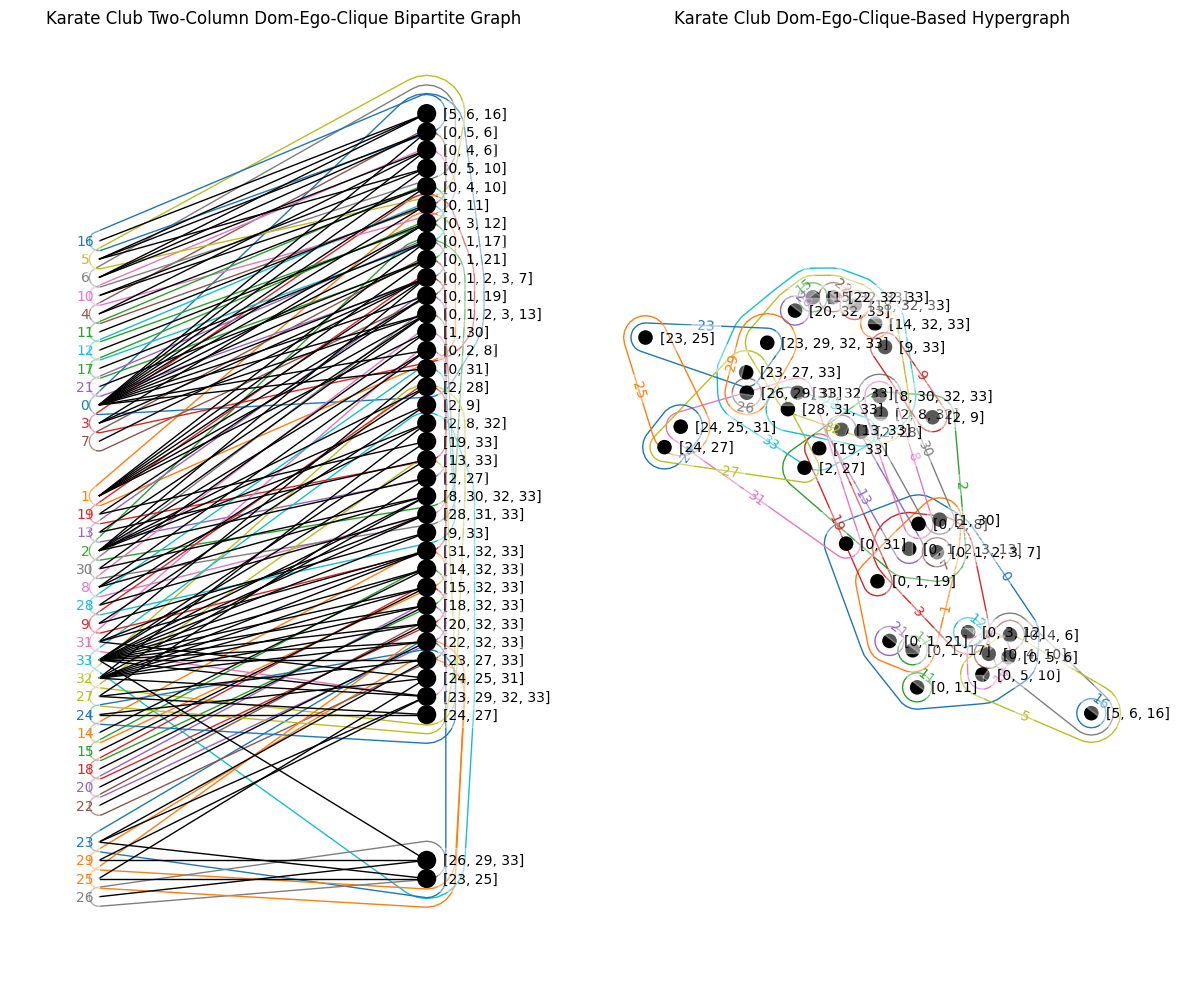

In [9]:
G = nx.karate_club_graph()
egos,alters=domego(G)
hypergraph=create_clique_based_hypergraph(G, egos=None)
hg_d = {str(k): [str(vv) for vv in v] for k, v in hypergraph.items()}
print(len(hg_d),hg_d)

H_hnx = hnx.Hypergraph(hg_d)

fig, axes = plt.subplots(1, 2, figsize=(12, 10))

hnx.draw_bipartite_using_euler(H_hnx, ax=axes[0])
axes[0].set_title("Karate Club Two-Column Dom-Ego-Clique Bipartite Graph")

hnx.draw(H_hnx, ax=axes[1])
axes[1].set_title("Karate Club Dom-Ego-Clique-Based Hypergraph")

plt.tight_layout()
plt.show()

In [10]:
d=hg_d
name1='Hyperedge'
name2='Vertices'
vertex_size=10 
hyperedge_size=3
vertex_color="yellow"
hyperedge_colors =[c for c in random.sample(all_colors,len(d)) if c!=vertex_color]
# hyperedge_colors = ["cyan", "lime", "lightcoral", "violet"]
roundness=1
output_file="Karate_domego_clique_bipartite_hypergraph.html"
hgp_pyvis(d, name1, name2, vertex_size, hyperedge_size, vertex_color, hyperedge_colors, roundness, output_file)

No. of all vertices = 34, no. of dominating egos = 10, no. of edges = 78, no. of cliques = 36
No. of vertices = 33, no. of hyperedges = 8


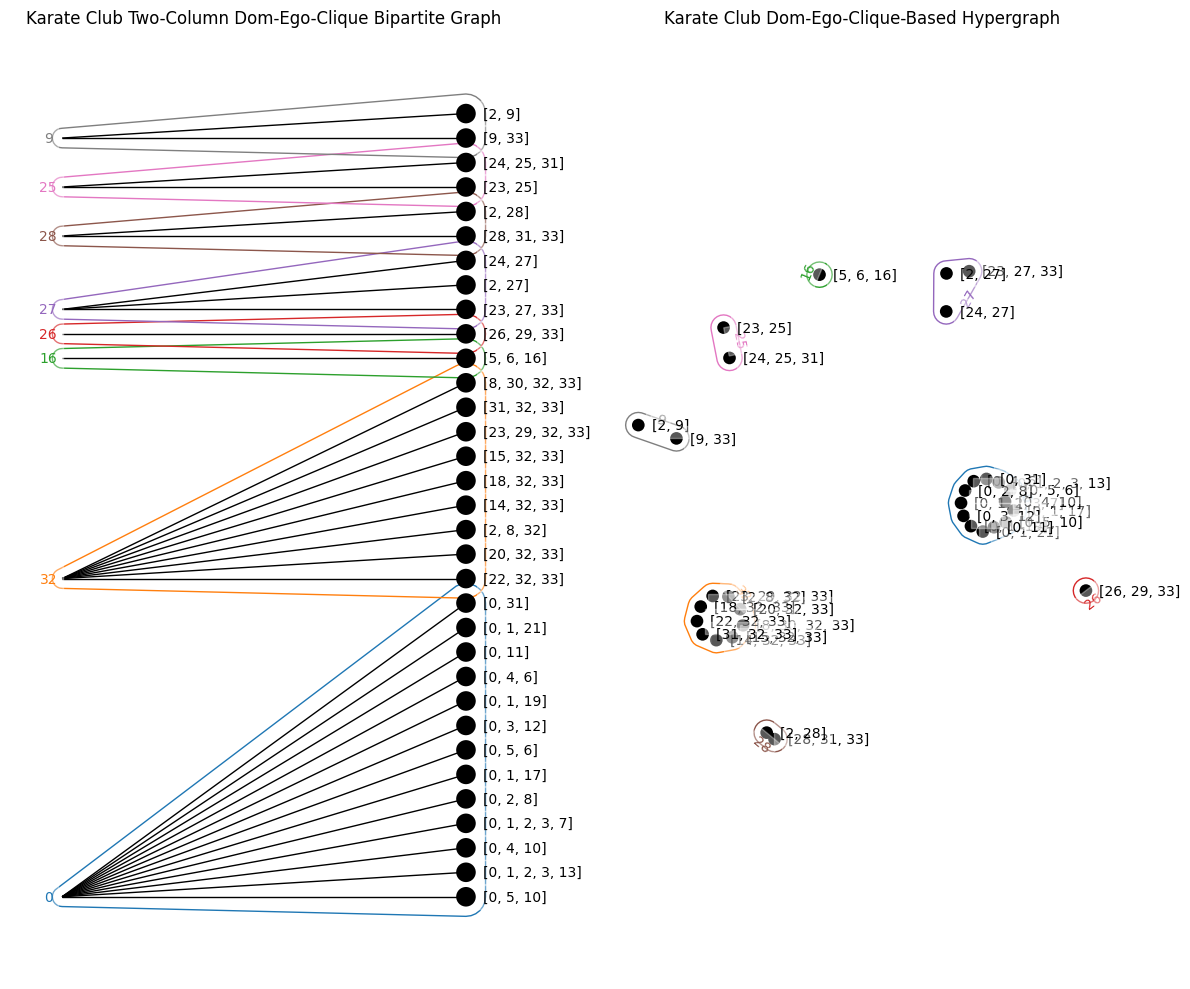

In [11]:
G = nx.karate_club_graph()
egos,alters=domego(G)
# egos=[1,6,26,34]
cliques = find_maximal_cliques(G)
print(f"No. of all vertices = {len(G)}, no. of dominating egos = {len(egos)}, no. of edges = {len(G.edges)}, no. of cliques = {len(cliques)}")

hypergraph=create_clique_based_hypergraph(G, egos=egos)
hg_d = {str(k): [str(vv) for vv in v] for k, v in hypergraph.items()}

print(f"No. of vertices = {len(set().union(*hg_d.values()))}, no. of hyperedges = {len(hg_d)}")
H_hnx = hnx.Hypergraph(hg_d)

fig, axes = plt.subplots(1, 2, figsize=(12, 10))

hnx.draw_bipartite_using_euler(H_hnx, ax=axes[0])
axes[0].set_title("Karate Club Two-Column Dom-Ego-Clique Bipartite Graph")

hnx.draw(H_hnx, ax=axes[1])
axes[1].set_title("Karate Club Dom-Ego-Clique-Based Hypergraph")

plt.tight_layout()
plt.show()

In [12]:
d=hg_d
name1='Hyperedge'
name2='Vertices'
vertex_size=10 
hyperedge_size=3
vertex_color="yellow"
# hyperedge_colors =[c for c in random.sample(all_colors,len(d)) if c!=vertex_color]
hyperedge_colors = ["cyan", "lime", "orange", "violet","lightsalmon","olive","mediumslateblue","orange"]
roundness=1
output_file="Karate_domego_clique_bipartite_hypergraph.html"
hgp_pyvis(d, name1, name2, vertex_size, hyperedge_size, vertex_color, hyperedge_colors, roundness, output_file)

In [13]:
filepath = "hypergraph_bipartite1e_LivingLab_Wave1a.html"
display(IFrame(src=filepath, width=1000, height=1000))

In [14]:
filepath = "hypergraph_bipartite1e_LivingLab_Wave2a.html"
display(IFrame(src=filepath, width=1000, height=1000))